## Plotting the ECMWF Forecast evolution  

This notebook plots the ecmwf data of forecast for the 18 of may of 2024, from diferent days to understand the evolution of the forecast up to this day, including mean forecast and standar deviation

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import scipy 
import pandas as pd
import os
import matplotlib.dates as mdates
from functions import plots

In [2]:
path='g:\\Mi unidad\\Universitat\\[SoSe24] Fundamentals of Earth System data processing\\ESDP_project\\Weather_forecast_case_stuty'
os.chdir(path)

In [3]:
lat = 50.94
lon = 6.96
data_path = [ 'data\\perturbed\\'+s  for s in os.listdir('data\\perturbed')]
data_path = sorted(data_path, reverse=True)




<frozen importlib._bootstrap>:488: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


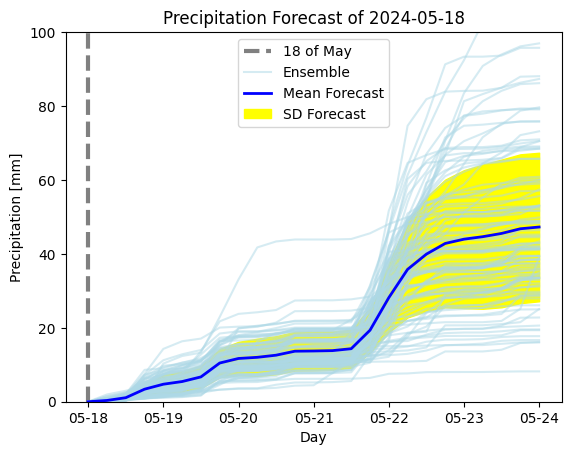

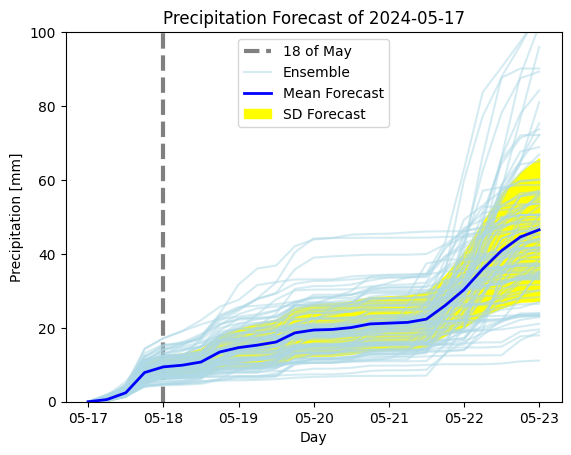

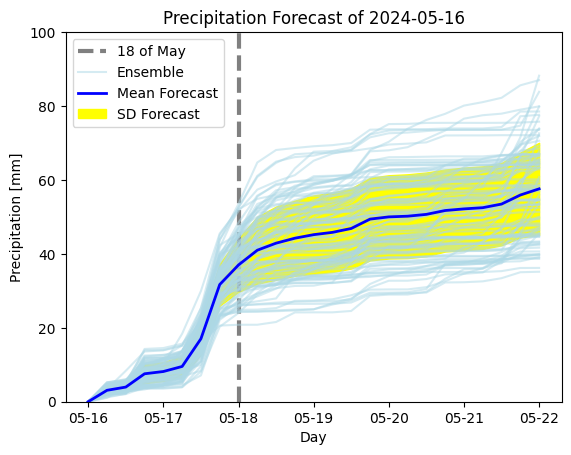

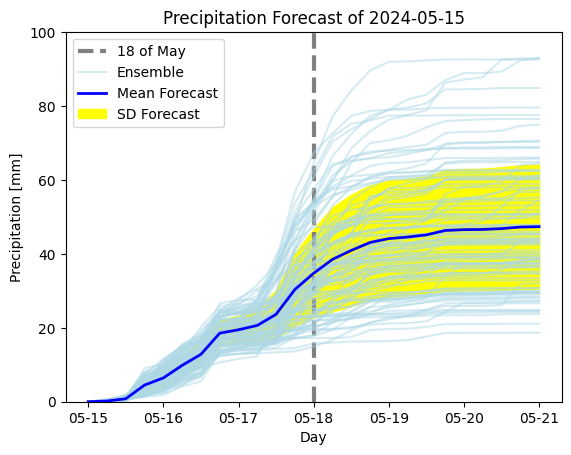

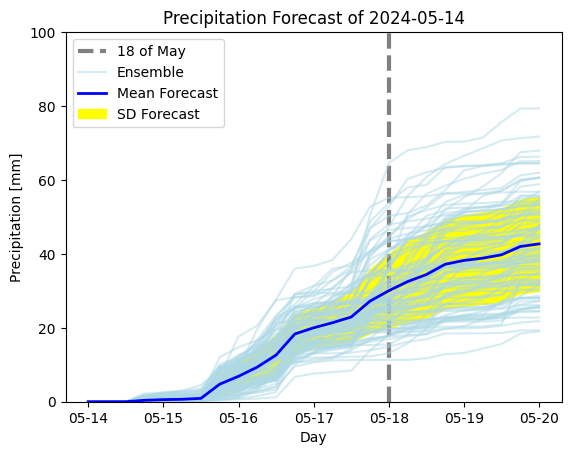

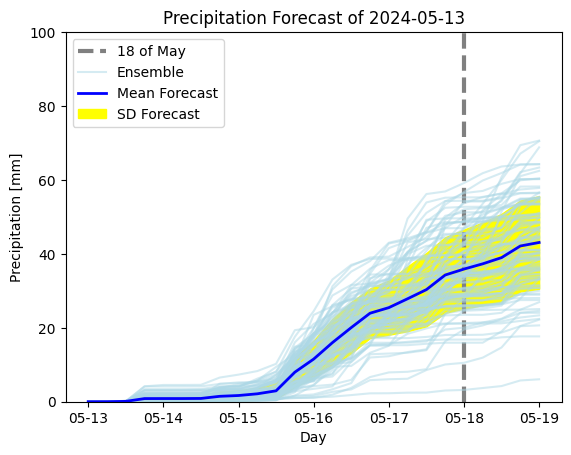

In [4]:
for file in data_path:
    data = xr.open_dataset(file)
    data.close()
    ensemble, mean_precipitation,std_precipitation = plots.extract_forecasts_info(data, lat, lon)
    plots.plot_precipitation_forecasts(ensemble, mean_precipitation, std_precipitation, ylim=(0,100))


In [6]:
#this code is for extracting a dataframe of all the predictions for the 18 of may
#first, open one file to make the first dataframe to wich concat

data = xr.open_dataset(data_path[0])
data.close()
#we save the day of the file we are using
forecast_day = data.time.values[0]

#the index is to obtain all the values htat have the 18 of may
Mays18_index = ((data['time']>=pd.to_datetime('2024-05-18T00:00:00.000000000'))&
(data['time']<=pd.to_datetime('2024-05-19T00:00:00.000000000')))

#then we extract the info, interpolate to the position we are studing 
data = data.sel(time= Mays18_index)
data = data.interp(longitude=lon, latitude=lat)

#finally we only extract the data frame
df = data.to_dataframe(dim_order=None)
df['forecast_day'] = forecast_day
df = df.reset_index()

for file in data_path[1:]:
    data = xr.open_dataset(file)
    data.close()
    forecast_day = data.time.values[0]
    data.interp(longitude=lon, latitude=lat)
    Mays18_index = ((data['time']>=pd.to_datetime('2024-05-18T00:00:00.000000000'))&
                    (data['time']<=pd.to_datetime('2024-05-19T00:00:00.000000000')))
    data = data.sel(time= Mays18_index)
    data = data.interp(longitude=lon, latitude=lat)
    df1 = data.to_dataframe(dim_order=None)
    df1['forecast_day'] = forecast_day
    df1 = df1.reset_index()
    #after extracting the dataframe, we concat to the first one

    df = pd.concat([df,df1])


Text(0.5, 1.0, 'Boxplot of forecasts per day for the 2024-05-18T')

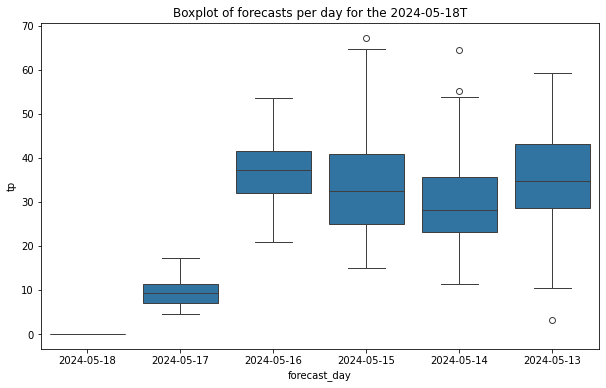

In [7]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x="forecast_day" ,
            y="tp",
            data= df[df['time'] == pd.to_datetime('2024-05-18T00:00:00.000000000')]
            )
plt.title('Boxplot of forecasts per day for the 2024-05-18 at 0 hours')